In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
births=pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [3]:
births

year  month  day gender  births
0      1969      1  1.0      F    4046
1      1969      1  1.0      M    4440
2      1969      1  2.0      F    4454
3      1969      1  2.0      M    4548
4      1969      1  3.0      F    4548
...     ...    ...  ...    ...     ...
15542  2008     10  NaN      M  183219
15543  2008     11  NaN      F  158939
15544  2008     11  NaN      M  165468
15545  2008     12  NaN      F  173215
15546  2008     12  NaN      M  181235

[15547 rows x 5 columns]

In [4]:
births.to_csv('births.csv')
#se salvo en una archivo csv en el directorio actual

In [5]:
births.head()

year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

In [6]:
births['decade']=10*(births['year']//10)
#agregando una nueva columna
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum')


gender         F         M
decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428

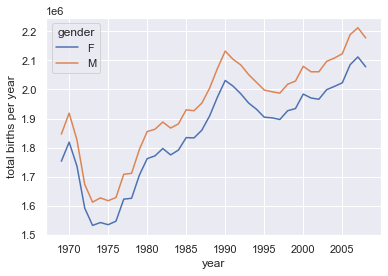

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender',
aggfunc='sum').plot()
plt.ylabel('total births per year');

In [8]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [9]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [10]:
 # set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

<ipython-input-10-0903fe5331f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day'] = births['day'].astype(int)


In [11]:
 # create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
100 * births.month +
births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

<ipython-input-11-9fd1e39c006e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['dayofweek'] = births.index.dayofweek


In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl

<ipython-input-13-5b6e6f3ae6b4>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


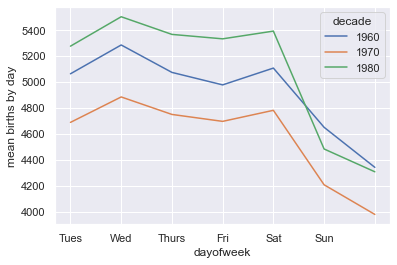

In [13]:
births.pivot_table('births', index='dayofweek',
columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [14]:
births_by_date = births.pivot_table('births',
[births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [15]:
 births_by_date.index = [pd.datetime(2012, month, day)
for (month, day) in births_by_date.index]
births_by_date.head()

<ipython-input-15-7f32df19d6c5>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625

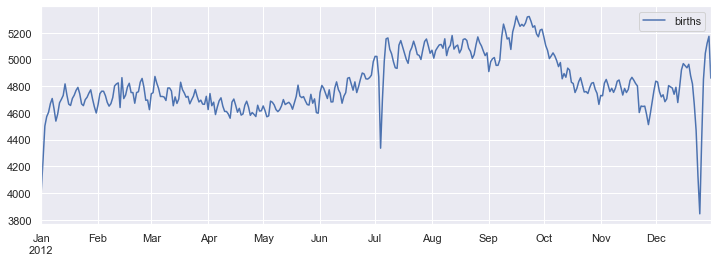

In [16]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);